# ***Create a Simple Linear Regression Model***
### **Himel Sarder**
### **info.himelcse@gmail.com**
### **GitHub : https://github.com/Himel-Sarder**

In [358]:
class MyLinearRegression:
    
    def __init__(self):
        self.m = None
        self.c = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
    
        for i in range(X_train.shape[0]):
            num += (X_train.iloc[i] - X_train.mean()) * (y_train.iloc[i] - y_train.mean())
            den += (X_train.iloc[i] - X_train.mean()) * (X_train.iloc[i] - X_train.mean())
    
        self.m = num / den
        self.c = y_train.mean() - self.m * X_train.mean()

        print('m : ', self.m)
        print('c : ', self.c)       
    
    def predict(self, X_test):
        
        print('X_test : ', X_test)
        
        return self.m * X_test + self.c

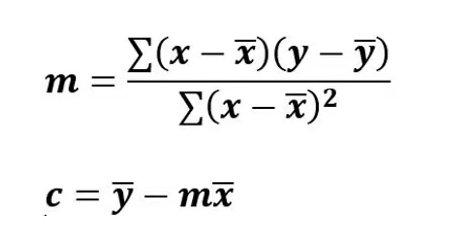

In [359]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [360]:
df = pd.read_csv('advertising.csv')

In [361]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [362]:
df.shape

(200, 4)

In [363]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

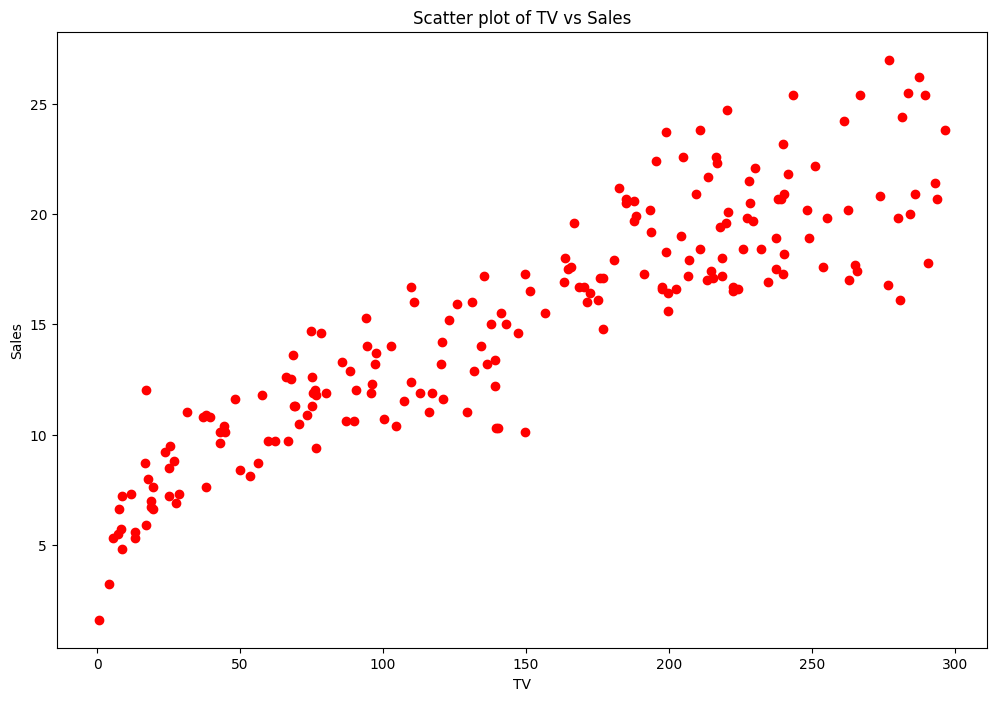

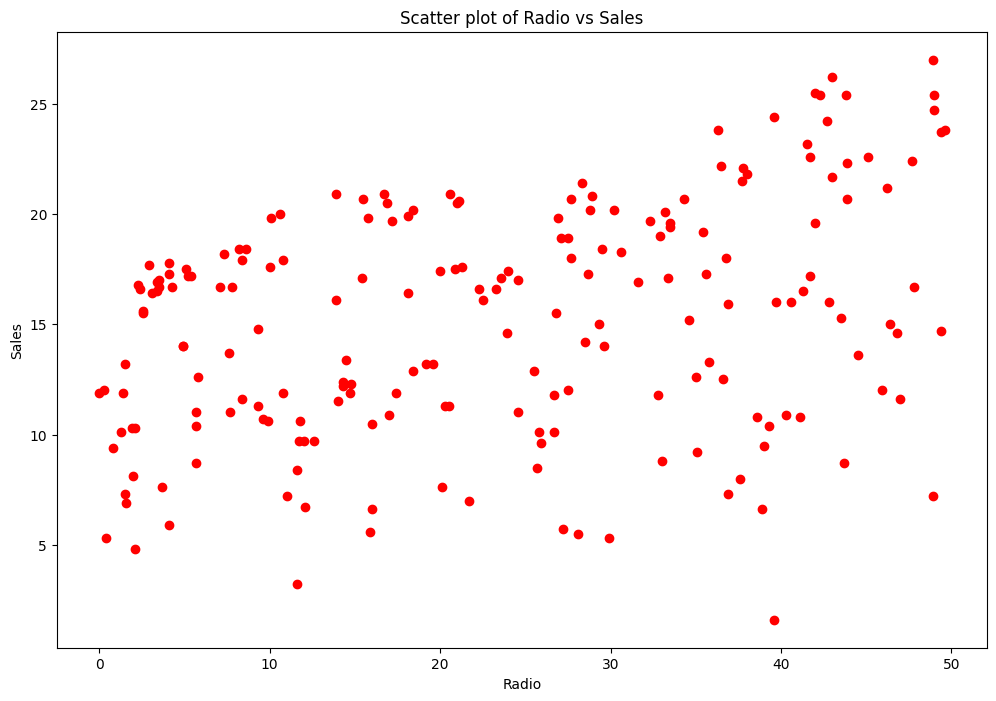

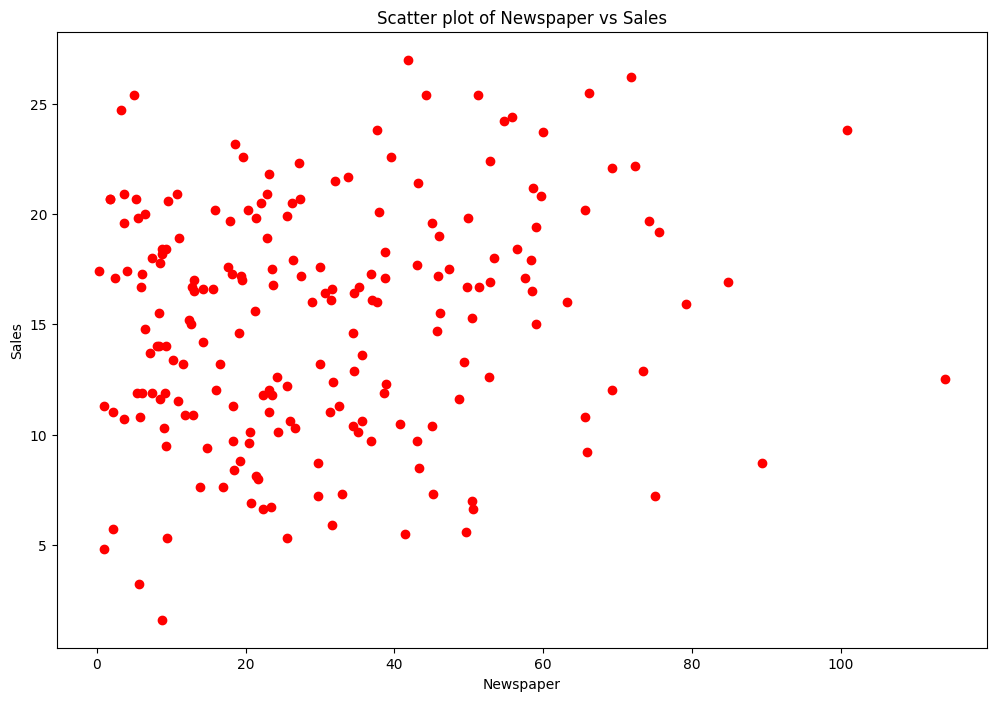

In [364]:
for column_name in df.columns:
    if column_name != 'Sales':
        plt.figure(figsize=(12, 8))
        plt.scatter(df[column_name], df['Sales'], c = 'red')
        plt.title(f'Scatter plot of {column_name} vs Sales')
        plt.xlabel(column_name)
        plt.ylabel('Sales')
        plt.show()

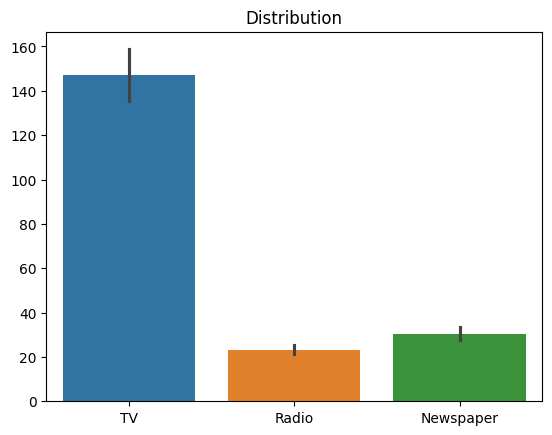

In [365]:
# box plots
sns.barplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title("Distribution")
plt.show()

In [366]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [367]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [368]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### ***How it works***:
Suppose -
- **Feature Matrix (`X`)**:
  ```python
  X = [[1], [2], [3], [4], [5]]
  ```
  Each element represents one sample with a single feature.
  
- **Target Vector (`y`)**:
  ```python
  y = [10, 20, 30, 40, 50]
  ```
  Each element corresponds to the target value for the respective feature in `X`.

### Splitting Process:
1. **Shuffling the Data**:  
   By default, `train_test_split` shuffles the data before splitting. The shuffling is controlled by the `random_state` parameter. With `random_state=2`, the shuffle order is deterministic and will always produce the same split.

   For `random_state=2`, the shuffled data might look like this (order depends on the random generator):
   - Shuffled `X`: `[[2], [1], [3], [4], [5]]`
   - Shuffled `y`: `[20, 10, 30, 40, 50]`

2. **Splitting into Training and Testing Sets**:
   - **`test_size=0.2`**: This specifies that 20% of the data will be used for testing. Since there are 5 samples, `0.2 * 5 = 1` sample will go to the test set, and the remaining 4 samples will go to the training set.
   - The first sample from the shuffled data becomes the test set:
     - `X_test = [[2]]`
     - `y_test = [20]`
   - The remaining samples form the training set:
     - `X_train = [[1], [3], [4], [5]]`
     - `y_train = [10, 30, 40, 50]`

### Why Does This Happen?
The split is determined by:
1. The shuffle order, which is controlled by `random_state`.
2. The proportion of data specified by `test_size`.

If you were to change `random_state` or remove it, the shuffle order would change, resulting in a different split.

In [383]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [384]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [385]:
mlr = MyLinearRegression()

In [386]:
mlr.fit(X_train, y_train)

m :  0.05454575291590796
c :  6.948683200001357


In [387]:
X_train.mean()

147.71142857142857

In [388]:
Y_train.mean()

20.26

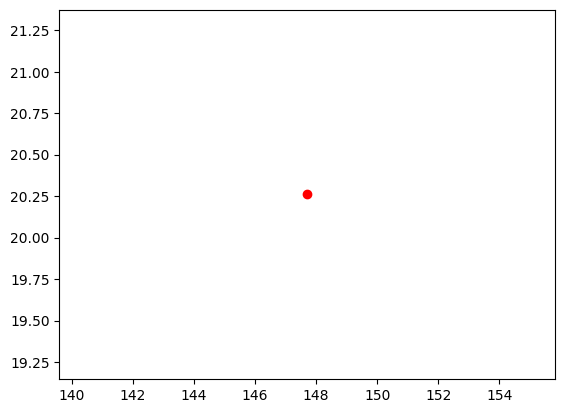

In [389]:
plt.scatter(X_train.mean(), Y_train.mean(), color='red', label='mean')

In [390]:
prediction = mlr.predict(X_test)
prediction

X_test :  126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

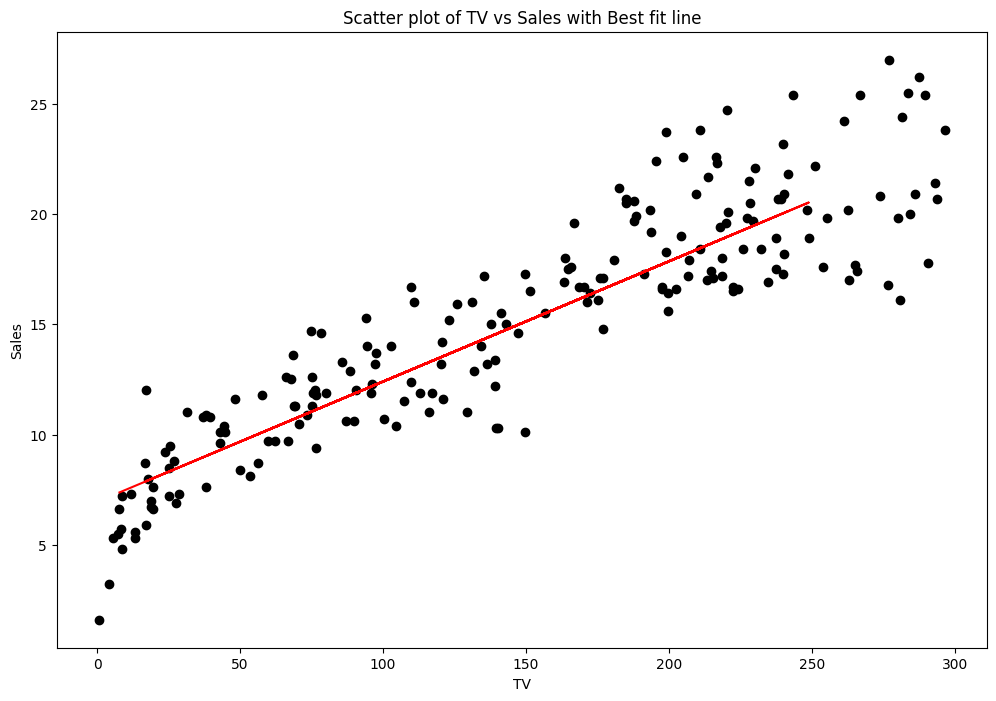

In [403]:
plt.figure(figsize=(12, 8))
plt.scatter(df['TV'], df['Sales'], c='black')
plt.plot(X_test, prediction, color='red', label='Best Fit Line')  # Best fit line
plt.title(f'Scatter plot of TV vs Sales with Best fit line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

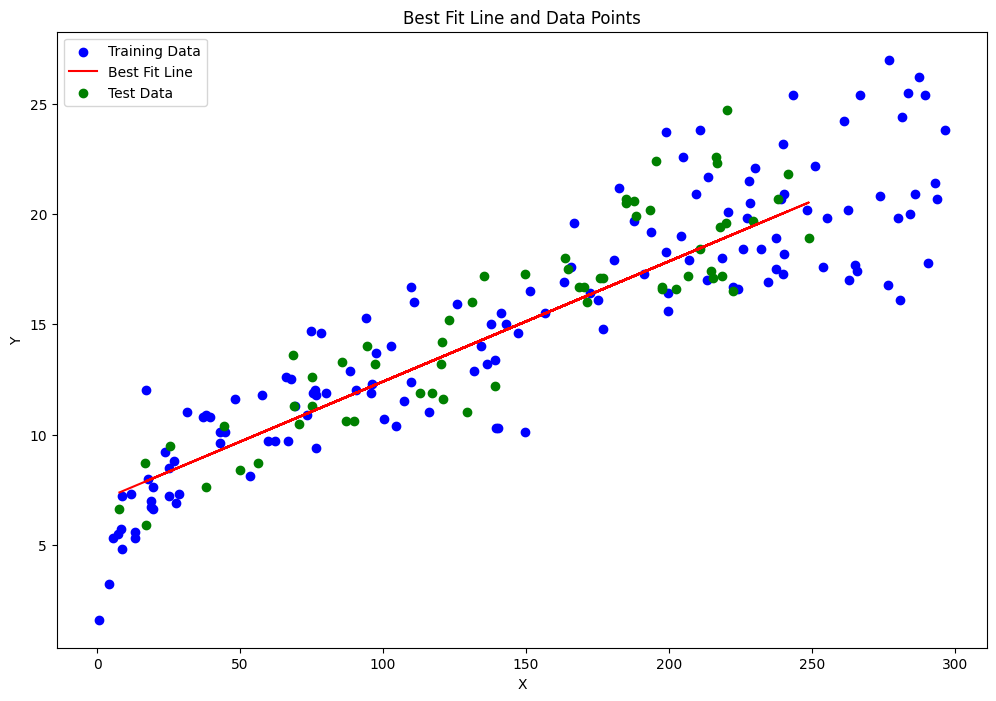

In [392]:
# For the best fit line, use the training data (X_train) and its predictions
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training Data')  # Actual training data points
plt.plot(X_test, prediction, color='red', label='Best Fit Line')  # Best fit line
plt.scatter(X_test, y_test, color='green', label='Test Data')  # Actual test data points
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line and Data Points')
plt.legend()
plt.show()

In [393]:
print(sqrt(mean_squared_error(y_test,prediction)))

2.019296008966231


In [394]:
X = df['TV']
y = df['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           7.93e-74
Time:                        05:51:35   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0